In [5]:
#Load of ionosphere data set
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics

url="https://raw.githubusercontent.com/andresjimenezgonzalez/MD/main/sample_5000_sin_outliers.csv"
data = pd.read_csv(url)
data_with_outliers = data.iloc[:, 1:]
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4999 non-null   int64  
 1   acousticness      4999 non-null   float64
 2   artist_name       4999 non-null   object 
 3   danceability      4999 non-null   float64
 4   duration_s        4999 non-null   float64
 5   energy            4999 non-null   float64
 6   instrumentalness  4999 non-null   float64
 7   key               4999 non-null   object 
 8   liveness          4999 non-null   float64
 9   loudness          4999 non-null   float64
 10  mode              4999 non-null   object 
 11  music_genre       4999 non-null   object 
 12  obtained_date     4999 non-null   object 
 13  popularity        4999 non-null   float64
 14  speechiness       4999 non-null   float64
 15  tempo             4999 non-null   float64
 16  MvOut             4999 non-null   object 


,Unnamed: 0,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2499.797960,0.306649,0.558988,237.116118,0.597664,0.066878,0.175655,-8.933259,44.460692,0.074878,119.787992,0.458090
std,1443.510626,0.341042,0.181554,76.958256,0.265831,0.146235,0.121125,5.508814,15.491637,0.060255,30.042747,0.250405
min,0.000000,0.000003,0.061300,28.947000,0.000953,-0.035474,0.019400,-28.124000,0.000000,0.023300,47.704000,0.024100
25%,1250.500000,0.020900,0.436000,190.379500,0.432000,0.000000,0.095900,-10.889000,34.000000,0.036700,95.038000,0.253500
50%,2500.000000,0.148000,0.572000,225.800000,0.646000,0.000089,0.125000,-7.315000,45.000000,0.048500,119.345000,0.449000
75%,3749.500000,0.556000,0.689500,269.101000,0.808000,0.055350,0.224206,-5.201500,56.000000,0.087750,140.054000,0.653500
max,4999.000000,0.996000,0.977000,543.000000,0.999000,0.716000,0.679000,1.314000,90.000000,0.289000,216.029000,0.990000


In [6]:
#data.music_genre = data.music_genre.replace({"Alternative": 0, "Anime": 1, "Blues": 2, "Classical": 3, "Country": 4, "Electronic": 5, "Hip-Hop": 6, "Jazz": 7, "Rap": 8, "Rock": 9})

# Separation into data and label
X = data.drop('music_genre', axis=1)
X = pd.get_dummies(X)
y = data['music_genre']

# Normalization:
X = preprocessing.normalize(X)


In [7]:
#We’ll use the train test split module from the sklearn package to divide the dataset into training and testing sections.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=10) 
gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=x_train,y=y_train,cv=cv)
np.mean(cv_scores) 

#nb = GaussianNB()
#nb.fit(x_train, y_train)
#The following accuracy score reflects how successfully our Sklearn Gaussian Naive Bayes model predicted music_genre using the test data.
#print("Naive Bayes score: ",nb.score(x_test, y_test))

0.5698755628325829

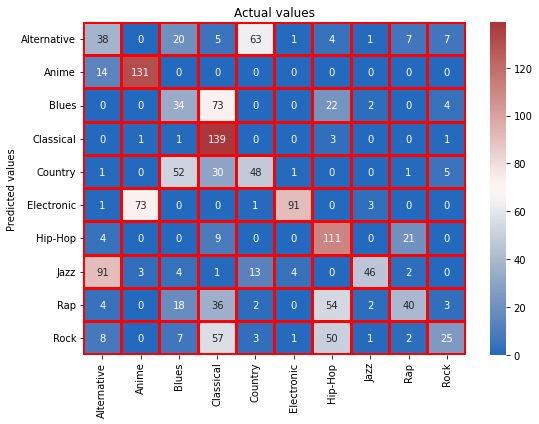

0.4686666666666667


In [15]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(gnb, X=x_test, y=y_test,  cv=cv)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, pred))

In [16]:
from typing import ClassVar
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

 Alternative       0.24      0.26      0.25       146
       Anime       0.63      0.90      0.74       145
       Blues       0.25      0.25      0.25       135
   Classical       0.40      0.96      0.56       145
     Country       0.37      0.35      0.36       138
  Electronic       0.93      0.54      0.68       169
     Hip-Hop       0.45      0.77      0.57       145
        Jazz       0.84      0.28      0.42       164
         Rap       0.55      0.25      0.34       159
        Rock       0.56      0.16      0.25       154

    accuracy                           0.47      1500
   macro avg       0.52      0.47      0.44      1500
weighted avg       0.53      0.47      0.45      1500



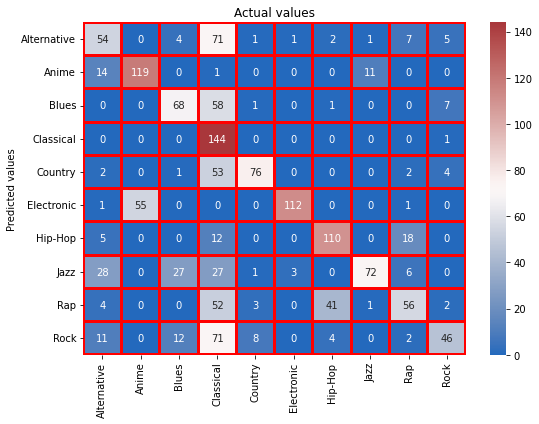

0.5713333333333334
              precision    recall  f1-score   support

 Alternative       0.45      0.37      0.41       146
       Anime       0.68      0.82      0.75       145
       Blues       0.61      0.50      0.55       135
   Classical       0.29      0.99      0.45       145
     Country       0.84      0.55      0.67       138
  Electronic       0.97      0.66      0.79       169
     Hip-Hop       0.70      0.76      0.73       145
        Jazz       0.85      0.44      0.58       164
         Rap       0.61      0.35      0.45       159
        Rock       0.71      0.30      0.42       154

    accuracy                           0.57      1500
   macro avg       0.67      0.57      0.58      1500
weighted avg       0.68      0.57      0.58      1500



In [13]:
clf = GaussianNB()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,pred),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = clf.classes_,
    yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))